<a href="https://colab.research.google.com/github/kamolui/Bioindustrias/blob/Luis/Bioinsumos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de la produccion mensual de las empresas.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [55]:
df = pd.read_csv('Bioinsumos.csv', header=2, sep=';')

In [56]:
df.head()

,EMPRESA,DIRECCION Y DATOS DE CONTACTO,AREAS DE LA REPUBLICA EN DONDE PUEDE DISTRIBUIR EL INSUMO,Nombre comercial producto,Categoria,Tipo de insumo de acuerdo al requerimiento de la SADER,Presentación: Liquida o Solida,(Dosis/ha),Sustancia o Microoganismo activo,Unidades,Capacidad de oferta mensual por producto,"Cultivo de Respuesta (Ej: Maiz;Trigo;Arroz,frijol, etc.)",Cuenta con registro RSCO (SI;NO; en proceso) si se encuentra en proceso favor de precisar si se encuentra ya ingresado en COFEPRIS o en que etapa del proceso se encuentra. En su caso incluir el número de registro,Cuenta con Dictament Técnico de efectividad biológica emitida por la SADER antes SAGARPA (SI; NO; EN PROCESO) Si se encuentra en Proceso favor de precisar si ya se cuenta con el Estudio de efectividad biológica emitido por un laboratorio tercero autorizad,"Si se cuenta con estudios de efectividad biológica emitido por un ente distinto al laboratorio autorizado (INIFAP, Colegio de Postgraduados, etc.) o casos de éxito del insumo (Necesario que se cuente con evidencia de la efectividad del insumo)",Confirmar si puede ofrecer servicio de seguimiento y capacitación del insumo (señalar en qué partes de la república)
0,"BIOAMIN, SA DE CV","Fresnos 151 Fracc. Arboledas, Saltillo, Coahui...",Toda la República mexicana,NITROBIOL®,BIOFERTILIZANTE,BIOFERTILIZANTE,Liquida,1 L por Ha,Azotobacter vinelandii y Azotobacter chroococcum,Litros,"10000,00","Chile, chile bel, jitomate, tomate de cáscara...",RSCO-121/III/13,SI,NaN,SI
1,"BIOAMIN, SA DE CV","Fresnos 151 Fracc. Arboledas, Saltillo, Coahui...",Toda la República mexicana,Fosforte®,BIOFERTILIZANTE,BIOFERTILIZANTE,Liquida,1 a 2 L por ha,Bacillus megaterium,Litros,"10000,00","Chile, chile bel, jitomate, tomate de cáscara...",RSCO-074/VII/20,SI,NaN,SI
2,"BIOAMIN, SA DE CV","Fresnos 151 Fracc. Arboledas, Saltillo, Coahui...",Toda la República mexicana,Fraurimax®,BIOFERTILIZANTE,BIOFERTILIZANTE,Liquida,1 a 2 L por ha,Frateuria aurantia,Litros,"10000,00","Chile, chile bel, jitomate, tomate de cáscara...",RSCO-044/V/18,SI,NaN,SI
3,"BIOKRONE, S.A. DE C.V.","Av. Las Fuentes #304 Col. Las Fuentes Celaya, ...",Todo el país,BAKTILLIS,FUNGICIDA,FUNGICIDA,Liquida,1.0 - 3.0 L/ha,Bacillus subtilis 1x10*12 UFC/mL,Litros,"15000,00","Solanaceas, Platano, Berries, Hierbas aromatic...",SI,SI,SI,Toda la República
4,"BIOKRONE, S.A. DE C.V.","Av. Las Fuentes #304 Col. Las Fuentes Celaya, ...",Todo el país,NATUCONTROL,FUNGICIDA,FUNGICIDA,Sólido,400- 800 g/ha,Trichoderma harzianum 1x10*7 UFC/g,Kg,"5,00","Solanaceas, Cereales, Caña de azucar, Vegetale...",SI,SI,SI,Toda la República


## Exploracion del data frame

### Cantidad de empresas

In [57]:
len(df['EMPRESA'].value_counts())

34

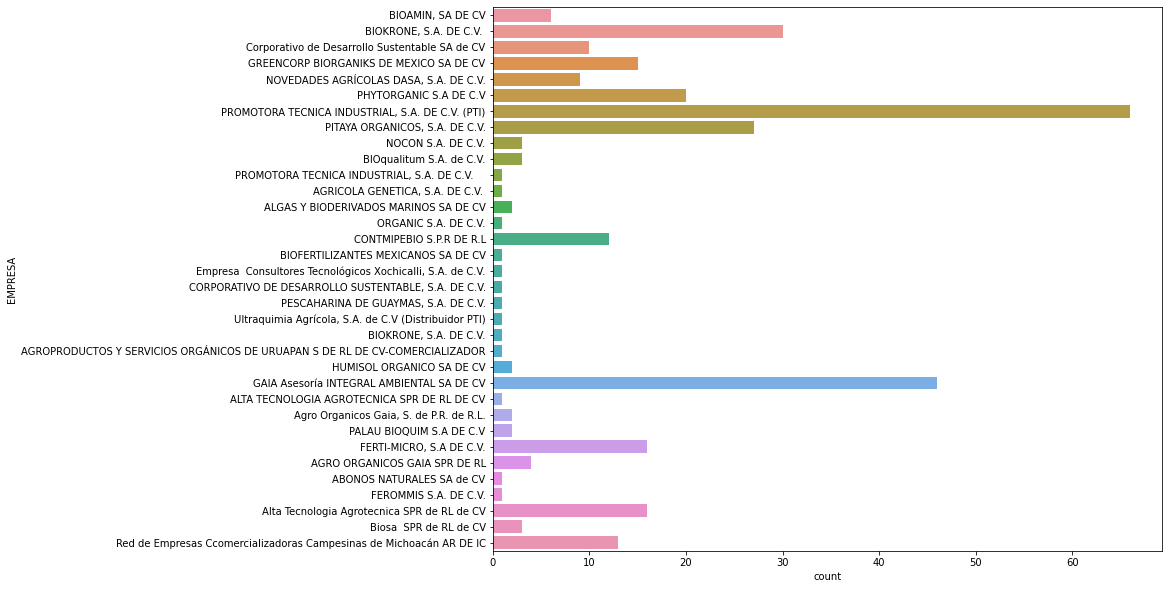

In [58]:
fig, axs = plt.subplots(1, figsize=(12, 10), sharey=True)
sn.countplot(y=df.EMPRESA,  data=df)

### Alcance de las empresas

In [59]:
df['AREAS DE LA REPUBLICA EN DONDE PUEDE DISTRIBUIR EL INSUMO'].value_counts()

COBERTURA NACIONAL                                                                                                                                      66
Todo el país                                                                                                                                            52
URUAPAN, MICH                                                                                                                                           46
TODA LA REPUBLICA                                                                                                                                       37
NAYARIT, GUERRERO, VERACRUZ, QUERETARO, CHIHUAHUA, CHIAPAS                                                                                              19
TODO EL TERRITORIO NACIONAL (NORESTE, NOROESTE, OCCIDENTE, BAJIO      Y  SURESTE)                                                                       14
Chiapas, Nayarit, Jalisco, Michoacán, Puebla, San Luis Potosí         

Vemos que hay muchos campos donde se da la misma informacion, pero con diferente formato, por lo que trataremos de generalizar el df.

#### Reduccion de dimensiones

In [60]:
l = ['TODA LA REPÚBLICA MEXICANA', 'TODO EL PAÍS', 'Areas de influencia. Todo el país',
     'Nacional', 'EN TODO EL PAÍS', 'En toda la Republica Mexicana', 'TODA LA REPUBLICA MEXICANA',
     'Toda la República mexicana', 'Toda la republica', 'TODO EL TERRITORIO NACIONAL (NORESTE, NOROESTE, OCCIDENTE, BAJIO      Y  SURESTE)',
     'TODA LA REPUBLICA', 'Todo el país', 'COBERTURA NACIONAL', 'NORESTE, NOROESTE, OCCIDENTE, BAJIO      Y  SURESTE',
     'Toda la republica ', 'En toda la Republica Mexicana ']

In [61]:
l2 = list(df['AREAS DE LA REPUBLICA EN DONDE PUEDE DISTRIBUIR EL INSUMO'].value_counts().index)
l2.remove('Nacional')

In [62]:
def impute_place(cols):
    place = cols[0]
    
    for i in range(len(l)):
      if place == l[i]:
        return 'Nacional'

    i = 0
    for i in range(len(l2)):
      if place == l2[i]:
        return 'Local o interestatal'

    return place

In [63]:
df['AREAS DE LA REPUBLICA EN DONDE PUEDE DISTRIBUIR EL INSUMO'] = df[['AREAS DE LA REPUBLICA EN DONDE PUEDE DISTRIBUIR EL INSUMO']].apply(impute_place,axis=1)

In [64]:
df['AREAS DE LA REPUBLICA EN DONDE PUEDE DISTRIBUIR EL INSUMO'].value_counts()

Nacional                196
Local o interestatal    124
Name: AREAS DE LA REPUBLICA EN DONDE PUEDE DISTRIBUIR EL INSUMO, dtype: int64

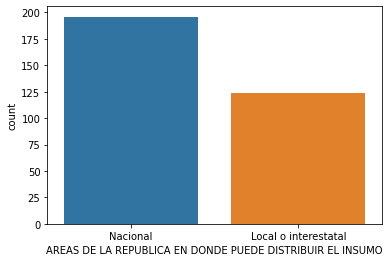

In [65]:
sn.countplot(x='AREAS DE LA REPUBLICA EN DONDE PUEDE DISTRIBUIR EL INSUMO', data=df)

### Produccion mensual

In [66]:
df.Unidades.value_counts()

Litros       211
Kg            91
Dosis         12
Litros/Kg      3
Analisis       1
kg             1
litros         1
Name: Unidades, dtype: int64

In [67]:
df['Categoria'].value_counts()

NUTRIENTES         68
INSECTICIDA        59
INOCULANTE         48
BIOFERTILIZANTE    43
FERTILIZANTE       32
FUNGICIDA          20
MEJORADOR          19
CONCENTRADOS       10
REPELENTES          7
BIOESTIMULANTE      6
ACELERADOR          5
ADHERENTE           2
OTROS               1
Name: Categoria, dtype: int64

In [68]:
print('Al mes se producen {} unidades de los diferentes productos'.format(df['Categoria'].value_counts().sum()))

Al mes se producen 320 unidades de los diferentes productos


#### Generalizar las unidades de medida

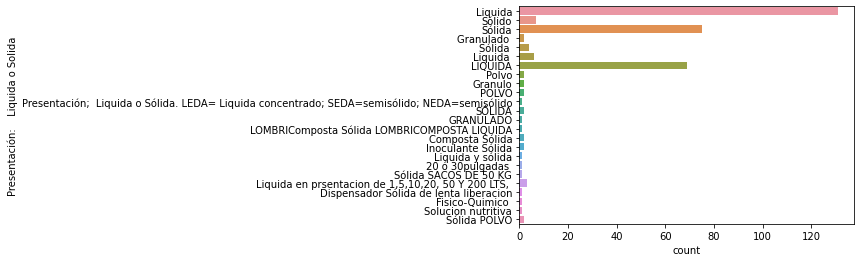

In [72]:
sn.countplot(y='Presentación:    Liquida o Solida', data=df)

In [73]:
df['Presentación:    Liquida o Solida'].value_counts()

Liquida                                                                                         131
Sólida                                                                                           75
LIQUIDA                                                                                          69
Sólido                                                                                            7
Liquida                                                                                           6
Sólida                                                                                            4
Liquida en prsentacion de 1,5,10,20, 50 Y 200 LTS,                                                3
Granulado                                                                                         2
Polvo                                                                                             2
SÓLIDA                                                                                            2


In [74]:
l = ['LIQUIDA', 'Liquida ', 'Liquida en prsentacion de 1,5,10,20, 50 Y 200 LTS, ']
l2 = ['Solida ', 'Sólido', 'Sólida ', 'Polvo', 'POLVO', 'Granulado ', 'Inoculante Sólida', 'Composta Sólida',
      'Sólida POLVO', 'Granulo', '20 ó 30pulgadas', 'Sólida SACOS DE 50 KG', 'Dispensador Sólida de lenta liberacion',
      'GRANULADO', 'SÓLIDA']
l3 = ['Presentación;  Liquida o Sólida. LEDA= Liquida concentrado; SEDA=semisólido; NEDA=semisólido',
      'LOMBRIComposta Sólida LOMBRICOMPOSTA LIQUIDA', '20 ó 30pulgadas ',
      'Liquida y sólida', 'Solucion nutritiva', 'Fisico-Quimico ']

In [75]:
def impute_present(cols):
    pres = cols[0]
    
    for i in range(len(l)):
      if pres == l[i]:
       return 'Liquida'
    i = 0
    for i in range(len(l2)):
      if pres == l2[i]:
        return 'Sólida'

    i = 0
    for i in range(len(l3)):
      if pres == l3[i]:
        return 'Ambas'
    return pres

In [76]:
df['Presentación:    Liquida o Solida'] = df[['Presentación:    Liquida o Solida']].apply(impute_present,axis=1)

In [77]:
df['Presentación:    Liquida o Solida'].value_counts()

Liquida    209
Sólida     105
Ambas        6
Name: Presentación:    Liquida o Solida, dtype: int64

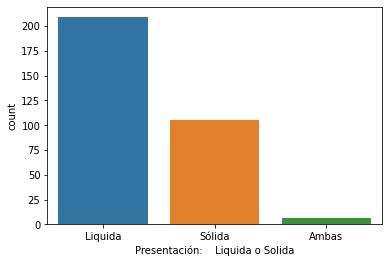

In [78]:
sn.countplot(x='Presentación:    Liquida o Solida', data=df)

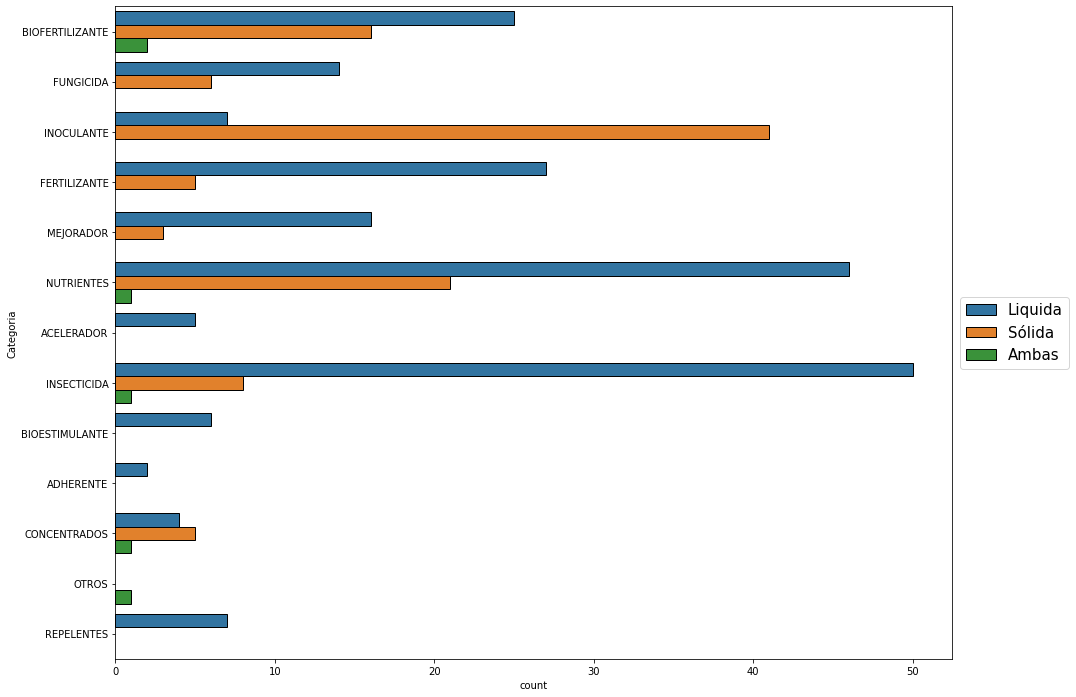

In [84]:
f, ax = plt.subplots(figsize=(15, 12))
sn.countplot(y='Categoria', hue='Presentación:    Liquida o Solida', data=df, edgecolor=(0,0,0), linewidth=1)
plt.legend(markerscale=3, fontsize=15, loc='center left',bbox_to_anchor=(1, 0.5))

In [90]:
df.to_excel("Bioinsumos_1.xlsx")  